In [19]:
import numpy as np
from numpy import linalg
import matplotlib.pyplot as plt
import plot
from plot import  plot_margin, plot_contour
import dataset
from dataset import gen_lin_separable_data, gen_non_lin_separable_data, gen_lin_separable_overlap_data, split_train,split_test
import SVM_model
from SVM_model import SVM

In [20]:
def linear_kernel(x1, x2):
    return np.dot(x1, x2)

def polynomial_kernel(x, y, p=3):
    return (1 + np.dot(x, y)) ** p

def gaussian_kernel(x, y, sigma=5.0):
    return np.exp(-linalg.norm(x-y)**2 / (2 * (sigma ** 2)))

## Implement linear SVM 

In [21]:
X1, y1, X2, y2 = gen_lin_separable_data()
X_train, y_train = split_train(X1, y1, X2, y2)
X_test, y_test = split_test(X1, y1, X2, y2)

     pcost       dcost       gap    pres   dres
 0: -1.7473e+01 -3.2780e+01  5e+02  2e+01  2e+00
 1: -2.4752e+01 -1.7660e+01  2e+02  8e+00  6e-01
 2: -6.4108e+01 -3.9347e+01  2e+02  7e+00  6e-01
 3: -4.0205e+01 -1.6171e+01  1e+02  3e+00  3e-01
 4: -9.2839e+00 -6.8607e+00  1e+01  3e-01  2e-02
 5: -5.4277e+00 -5.8057e+00  4e-01  1e-15  3e-15
 6: -5.6987e+00 -5.7025e+00  4e-03  5e-15  2e-15
 7: -5.7014e+00 -5.7015e+00  4e-05  9e-16  2e-15
 8: -5.7015e+00 -5.7015e+00  4e-07  6e-16  2e-15
Optimal solution found.
3 support vectors out of 180 points


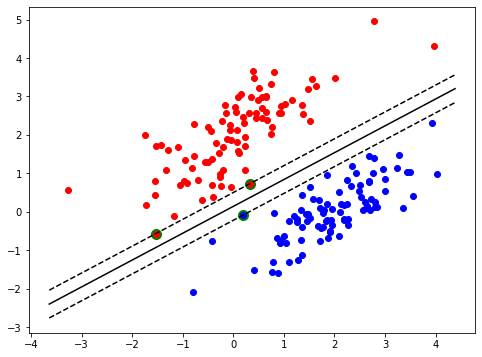

In [22]:
clf1 = SVM()
clf1.fit(X_train, y_train)
plot_margin(X_train[y_train==1], X_train[y_train==-1], clf1)

In [23]:
# test data accuracy
y_predict = clf1.predict(X_test)
correct = np.sum(y_predict == y_test)
print('{0} out of {1} predictions correct'.format(correct, len(y_predict)))

20 out of 20 predictions correct


## Implement linear SVM with soft margin

In [24]:
X1, y1, X2, y2 = gen_lin_separable_overlap_data()
X_train, y_train = split_train(X1, y1, X2, y2)
X_test, y_test = split_test(X1, y1, X2, y2)

     pcost       dcost       gap    pres   dres
 0: -2.0911e+01 -3.6452e+01  1e+03  3e+01  6e-15
 1: -3.7154e+00 -3.3724e+01  9e+01  1e+00  6e-15
 2: -1.8493e+00 -1.4471e+01  2e+01  1e-01  2e-15
 3: -1.8065e+00 -3.7109e+00  2e+00  1e-02  2e-15
 4: -2.2259e+00 -2.8127e+00  6e-01  3e-03  9e-16
 5: -2.3193e+00 -2.6002e+00  3e-01  1e-03  7e-16
 6: -2.3784e+00 -2.4874e+00  1e-01  3e-04  7e-16
 7: -2.4059e+00 -2.4475e+00  4e-02  7e-05  7e-16
 8: -2.4220e+00 -2.4244e+00  2e-03  2e-07  8e-16
 9: -2.4231e+00 -2.4233e+00  2e-04  5e-09  9e-16
10: -2.4232e+00 -2.4232e+00  3e-06  5e-11  9e-16
11: -2.4232e+00 -2.4232e+00  3e-08  5e-13  8e-16
Optimal solution found.
34 support vectors out of 180 points


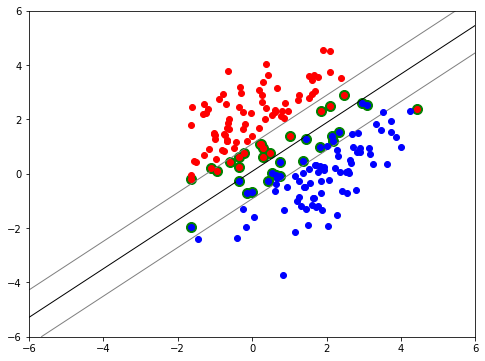

In [25]:
clf2 = SVM(C=0.1)
clf2.fit(X_train, y_train)
plot_contour(X_train[y_train==1], X_train[y_train==-1], clf2)

In [26]:
# test data accuracy
y_predict = clf2.predict(X_test)
correct = np.sum(y_predict == y_test)
print('{0} out of {1} predictions correct'.format(correct, len(y_predict)))

20 out of 20 predictions correct


## Implement non linear SVM with gaussian_kernel

In [27]:
X1, y1, X2, y2 = gen_non_lin_separable_data()
X_train, y_train = split_train(X1, y1, X2, y2)
X_test, y_test = split_test(X1, y1, X2, y2)

     pcost       dcost       gap    pres   dres
 0: -5.5397e+01 -1.6027e+02  5e+02  2e+01  2e+00
 1: -8.8358e+01 -2.0014e+02  2e+02  7e+00  8e-01
 2: -1.2770e+02 -2.3717e+02  2e+02  4e+00  5e-01
 3: -1.7148e+02 -2.7418e+02  1e+02  2e+00  3e-01
 4: -2.1262e+02 -2.9671e+02  1e+02  1e+00  1e-01
 5: -2.4463e+02 -2.5909e+02  1e+01  2e-02  2e-03
 6: -2.5413e+02 -2.5742e+02  3e+00  3e-03  3e-04
 7: -2.5684e+02 -2.5699e+02  2e-01  5e-05  6e-06
 8: -2.5695e+02 -2.5696e+02  3e-03  7e-07  8e-08
 9: -2.5696e+02 -2.5696e+02  3e-05  7e-09  8e-10
Optimal solution found.
10 support vectors out of 180 points


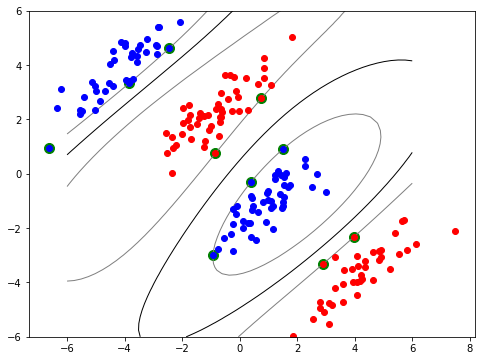

In [28]:
clf3= SVM(gaussian_kernel)
clf3.fit(X_train, y_train)
plot_contour(X_train[y_train==1], X_train[y_train==-1], clf3)

In [18]:
# test data accuracy
y_predict = clf.predict(X_test)
correct = np.sum(y_predict == y_test)
print('{0} out of {1} predictions correct'.format(correct, len(y_predict)))

20 out of 20 predictions correct
